## Enfoque analítico: 

Se aplicará una regresión lineal multivariable con el CSV de vinos.

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("winemag-data-130k-v2.csv")

In [3]:
df.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [4]:
df.shape

(129971, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

**Función de filtro por rango IQR:**

In [7]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
print ("1° Cuartil: ", Q1)
print ("3° Cuartil: ", Q3)
print ("Rango intercuartílico: ", IQR)

1° Cuartil:  17.0
3° Cuartil:  42.0
Rango intercuartílico:  25.0


In [8]:
df_filtered = df[(df['price'] < (1.5 * IQR + Q3)) & (df['price'] > (-1.5 * IQR + Q1))]

C:\Users\esteb\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


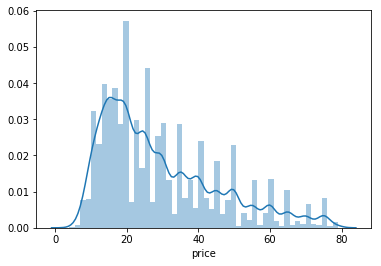

In [9]:
ax = sns.distplot(df_filtered['price'])

### Proceso la característica countries:

In [10]:
df_filtered['country'].unique()

array(['Portugal', 'US', 'Spain', 'Italy', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China'], dtype=object)

**Ahora establezco la transformación para clasificar los países en los continentes correspondientes, y lo almaceno en el nuevo DF:**

In [11]:
continents = {0:('Georgia', 'China', 'India'),
              1:('South Africa', 'Morocco', 'Egypt'),
              2:('US', 'Mexico', 'Canada'),
              3:('Argentina', 'Chile', 'Uruguay', 'Brazil', 'Peru'),
              5:('Italy', 'Portugal', 'Spain', 'France', 'Germany', 'Austria', 
                 'Israel', 'Hungary', 'Greece', 'Romania', 'Turkey', 'Czech Republic', 
                 'Slovenia', 'Luxembourg', 'Croatia', 'England', 'Lebanon', 'Serbia', 
                 'Moldova', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
                 'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia'),
              6:('Australia', 'New Zealand')}

In [12]:
def get_continent(country):
    for ind, v in continents.items():
        if country in v:
            return ind
    return -1

In [13]:
df_filtered = df_filtered.assign(continents = df_filtered['country'].apply(lambda x: get_continent(x)))

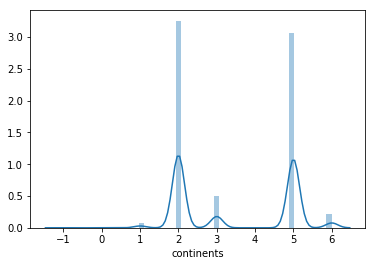

In [14]:
ax = sns.distplot(df_filtered['continents'])

Hago OneHotEncoder para aplicar más adelante una regresión lineal

In [15]:
enc = OneHotEncoder(handle_unknown='ignore')
data = enc.fit_transform(df_filtered[['continents']]).toarray()
a = pd.DataFrame(data = data)

In [16]:
a.columns = ['continents_0', 'continents_1', 'continents_2', 'continents_3', 'continents_4', 'continents_5', 'continents_6']

In [21]:
#categoricals_df = categoricals_df.set_index(df.index)
#df = pd.concat([df, categoricals_df], axis = 1)

In [22]:
a = a.set_index(df_filtered.index)

In [23]:
a

,continents_0,continents_1,continents_2,continents_3,continents_4,continents_5,continents_6
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
pd.concat([df_filtered, a], axis=1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,...,variety,winery,continents,continents_0,continents_1,continents_2,continents_3,continents_4,continents_5,continents_6
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,...,Portuguese Red,Quinta dos Avidagos,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,Pinot Gris,Rainstorm,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,...,Riesling,St. Julian,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,...,Pinot Noir,Sweet Cheeks,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,...,Tempranillo-Merlot,Tandem,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,...,Frappato,Terre di Giurfo,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,...,Gewürztraminer,Trimbach,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,...,Gewürztraminer,Heinz Eifel,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,...,Pinot Gris,Jean-Baptiste Adam,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,...,Cabernet Sauvignon,Kirkland Signature,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### A Partir de acá comienzo las tareas de Machine Learning (Regresión Lineal):

**Realizo Split 70/30:**

In [26]:
msk = np.random.rand(len(df_filtered)) < 0.7

In [27]:
train = df_filtered[msk]
test = df_filtered[~msk]

In [28]:
print(train.shape)
print(test.shape)

(79527, 15)
(34207, 15)


In [29]:
# Creo el objeto de Regresion lineal
regr = linear_model.LinearRegression()

**Aplico la transformación entre la característica 'price' y 'points'**

In [30]:
regr.fit(train[['price']], train[['points']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Y ahora calculo predicciones para los parámetros de prueba:

In [31]:
points_y_pred = regr.predict(test[['price']])

A continuación, muestro los coeficientes de la recta generada y métricas:
    **error cuadrático medio**;
    **R2**

In [32]:
print('Coeficientes: \n', regr.coef_, regr.intercept_)
print("MSE: %.2f"
      % mean_squared_error(test['points'], points_y_pred))

Coeficientes: 
 [[0.09641544]] [85.37351667]
MSE: 6.03


Graficación:

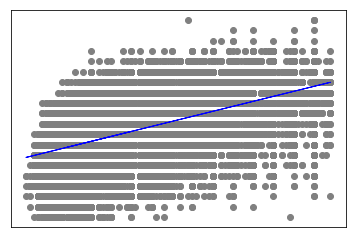

In [33]:
plt.scatter(test['price'], test['points'],  color='grey')
plt.plot(test['price'], points_y_pred, color='blue', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

### Ahora analizo la relación 'points' vs 'continents'

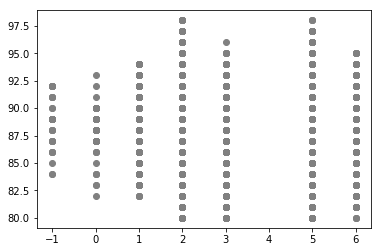

In [34]:
plt.scatter(train['continents'], train['points'],  color='grey')

In [35]:
regr.fit(train[['continents']], train[['points']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)